In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

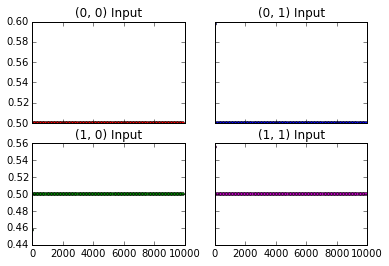

In [2]:
#XOR no hidden layers

#Initialize test vectors for plotting
a1 = [0, 0]
a2 = [0, 1]
a3 = [1, 0]
a4 = [1, 1]

# Plot setup
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.set_title('(0, 0) Input')
ax2.set_title('(0, 1) Input')
ax3.set_title('(1, 0) Input')
ax4.set_title('(1, 1) Input')

def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)

    return 1/(1+np.exp(-x))
    
x_train = np.array([    [0, 0],
                        [0, 1],
                        [1, 0],
                        [1, 1]])

y_train = np.array([[0, 1, 1, 0]]).T

np.random.seed(1)

syn0 = 2*np.random.random((2,1)) - 1

#10,000 iterations
for i in range(0, 10000):
    #propagation
    l0 = x_train
    l1 = nonlin(np.dot(l0,syn0))
    
    #compute error
    l1_error = y_train - l1

    #compute weight delta
    l1_delta = l1_error * nonlin(l1,True)

        
    #update weights
    syn0 += np.dot(l0.T,l1_delta)

    if i%100 == 0:
        output1 = nonlin(np.dot(a1, syn0))
        ax1.plot(i, output1, 'ro', markersize=3)    
    
        output2 = nonlin(np.dot(a2, syn0))
        ax2.plot(i, output2, 'bo', markersize=3)    
    
        output3 = nonlin(np.dot(a3, syn0))
        ax3.plot(i, output3, 'go', markersize=3)    
    
        output4 = nonlin(np.dot(a4, syn0))
        ax4.plot(i, output4, 'mo', markersize=3)
        
plt.show()

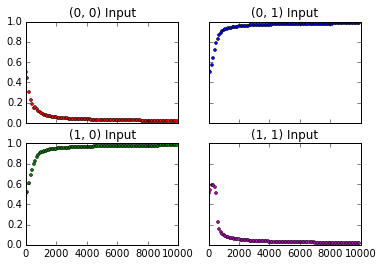

In [2]:
#XOR One hidden layer

#Initialize test vectors for plotting progress
a1 = [0, 0]
a2 = [0, 1]
a3 = [1, 0]
a4 = [1, 1]

# Plot setup
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.set_title('(0, 0) Input')
ax2.set_title('(0, 1) Input')
ax3.set_title('(1, 0) Input')
ax4.set_title('(1, 1) Input')

def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)

    return 1/(1+np.exp(-x))
    
x_train = np.array([    [0, 0],
                        [0, 1],
                        [1, 0],
                        [1, 1]])

y_train = np.array([[0, 1, 1, 0]]).T

np.random.seed(1)
syn0 = 2*np.random.random((2, 4)) - 1
syn1 = 2*np.random.random((4, 1)) - 1

for i in range(0, 10000):
    #propagation
    l0 = x_train
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))
    
    #compute error, weight delta
    l2_error = y_train - l2
    l2_delta = l2_error * nonlin(l2,True)
    
    #compute error, weight delta
    l1_error = l2_delta.dot(syn1.T)
    l1_delta = l1_error * nonlin(l1,True)
    
    syn1 += np.dot(l1.T,l2_delta)
    syn0 += np.dot(l0.T,l1_delta)
    
    if i%100 == 0:
        output1 = nonlin(np.dot( nonlin(np.dot(a1, syn0)), syn1))
        ax1.plot(i, output1, 'ro', markersize=3)    
    
        output2 = nonlin(np.dot( nonlin(np.dot(a2, syn0)), syn1))
        ax2.plot(i, output2, 'bo', markersize=3)    
    
        output3 = nonlin(np.dot( nonlin(np.dot(a3, syn0)), syn1))
        ax3.plot(i, output3, 'go', markersize=3)    
    
        output4 = nonlin(np.dot( nonlin(np.dot(a4, syn0)), syn1))
        ax4.plot(i, output4, 'mo', markersize=3)
        
plt.show()
